In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

sns.set(style="whitegrid")

In [15]:
# Load dataset
df = pd.read_csv("Employee Attrition_dataset.csv")

# Basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
# Check missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
pd.concat([missing, missing_percent], axis=1, keys=["Count", "Percent"])


,Count,Percent
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


In [17]:
# Duplicates
print("Duplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


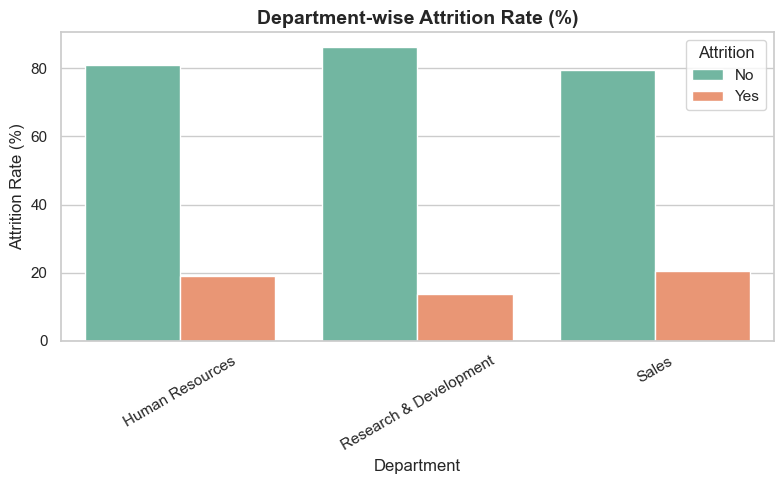

In [18]:
plt.figure(figsize=(8,5))
dept_attrition = (
    df.groupby("Department")["Attrition"]
    .value_counts(normalize=True)
    .rename("Percentage")
    .mul(100)
    .reset_index()
)
sns.barplot(x="Department", y="Percentage", hue="Attrition",
            data=dept_attrition, palette="Set2")
plt.title("Department-wise Attrition Rate (%)", fontsize=14, weight="bold")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Department")
plt.xticks(rotation=30)
plt.legend(title="Attrition")
plt.tight_layout()
plt.show()


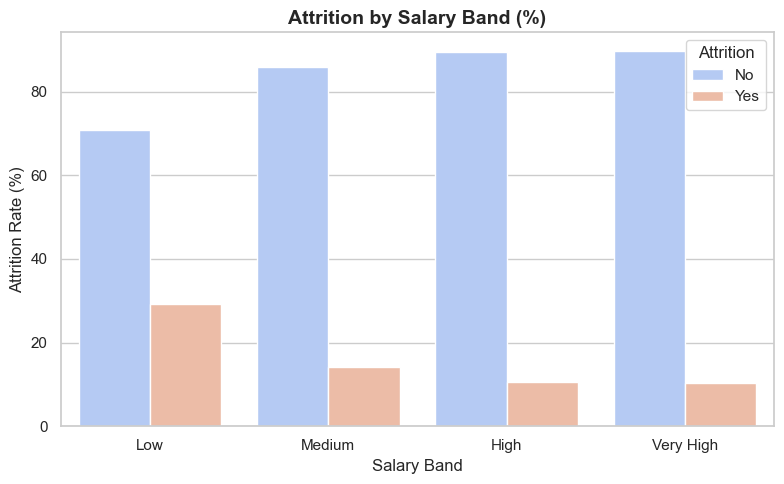

In [19]:
df['SalaryBand'] = pd.qcut(df['MonthlyIncome'], 4, labels=['Low','Medium','High','Very High'])

plt.figure(figsize=(8,5))
salary_attrition = (
    df.groupby("SalaryBand", observed=True)["Attrition"]
    .value_counts(normalize=True)
    .rename("Percentage")
    .mul(100)
    .reset_index()
)
sns.barplot(x="SalaryBand", y="Percentage", hue="Attrition",
            data=salary_attrition, palette="coolwarm")
plt.title("Attrition by Salary Band (%)", fontsize=14, weight="bold")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Salary Band")
plt.legend(title="Attrition")
plt.tight_layout()
plt.show()


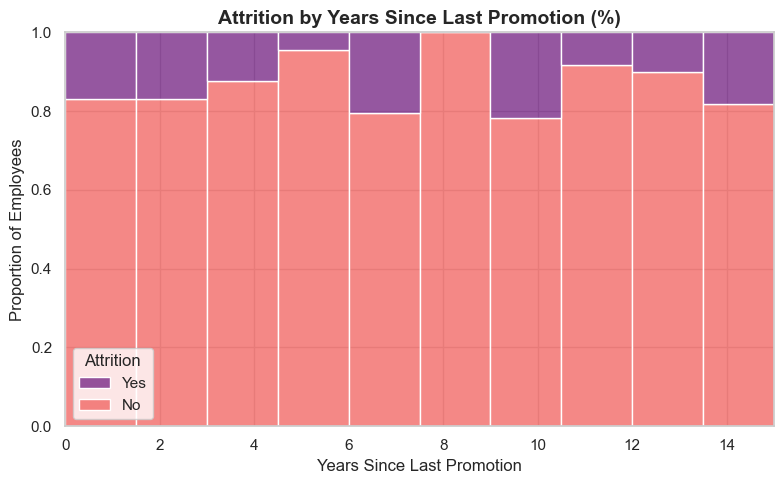

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="YearsSinceLastPromotion", hue="Attrition",
             multiple="fill", bins=10, palette="magma")
plt.title("Attrition by Years Since Last Promotion (%)", fontsize=14, weight="bold")
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Proportion of Employees")
plt.tight_layout()
plt.show()


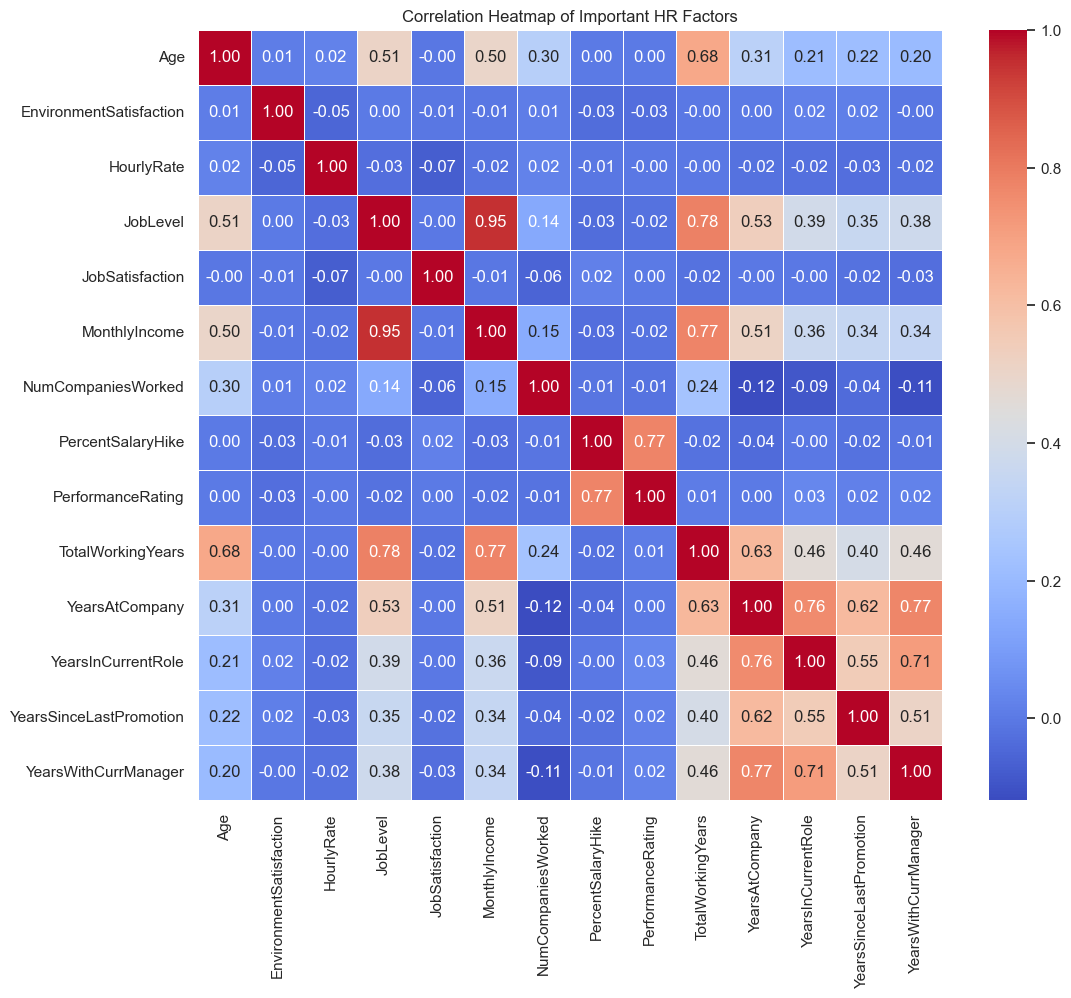

In [21]:
important_columns = [
    'Age', 'EnvironmentSatisfaction','HourlyRate','JobLevel','JobSatisfaction','MonthlyIncome',
    'NumCompaniesWorked','PercentSalaryHike','PerformanceRating','TotalWorkingYears', 
    'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'
]

plt.figure(figsize=(12, 10))
sns.heatmap(df[important_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Important HR Factors")
plt.show()


In [22]:
# ===============================
# 5. Model Building (Clean)
# ===============================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Encode categorical & category columns
le = LabelEncoder()
for col in df.select_dtypes(include=["object", "category"]).columns:
    df[col] = le.fit_transform(df[col])

# Features & target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (only needed for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


--- Logistic Regression ---
Accuracy: 0.8775510204081632
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       247
           1       0.69      0.43      0.53        47

    accuracy                           0.88       294
   macro avg       0.79      0.69      0.73       294
weighted avg       0.86      0.88      0.87       294



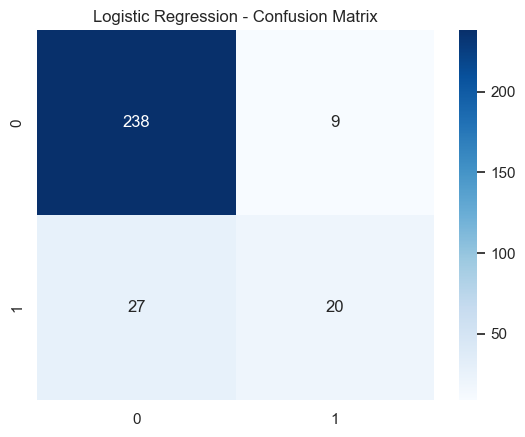

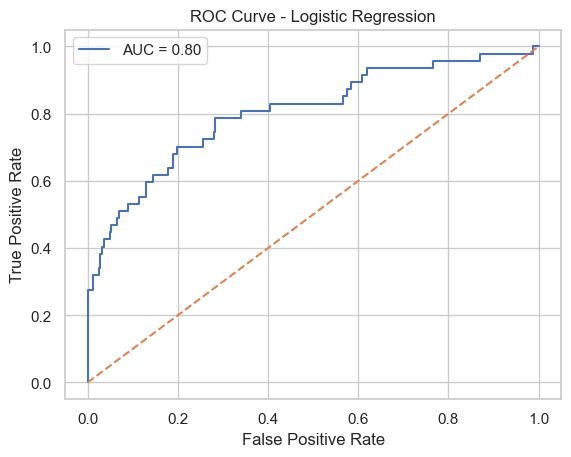

In [23]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# ROC Curve
y_prob = log_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr,tpr):.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(); plt.show()


--- Decision Tree ---
Accuracy: 0.8435374149659864
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.53      0.19      0.28        47

    accuracy                           0.84       294
   macro avg       0.70      0.58      0.60       294
weighted avg       0.81      0.84      0.81       294



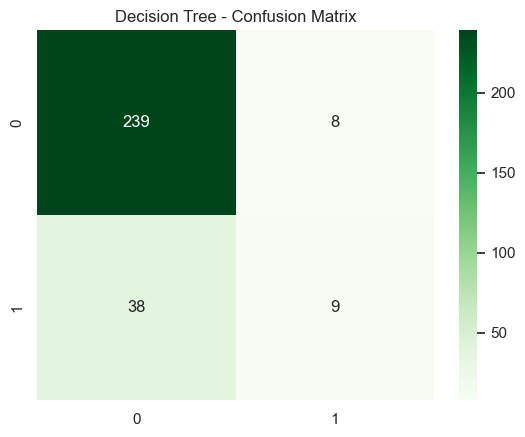

C:\Users\Javagar\AppData\Local\Temp\ipykernel_7924\426726220.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis")


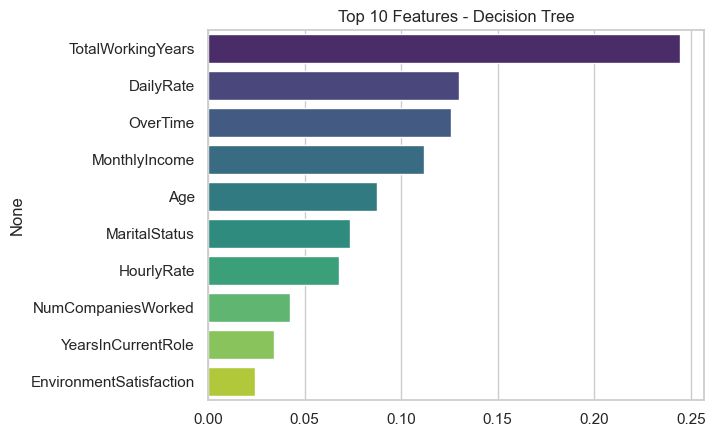

In [24]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("--- Decision Tree ---")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# Feature importance
importances = pd.Series(tree_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)[:10]
sns.barplot(x=importances.values, y=importances.index, palette="viridis")
plt.title("Top 10 Features - Decision Tree")
plt.show()


✅ SHAP Summary Plot - Logistic Regression


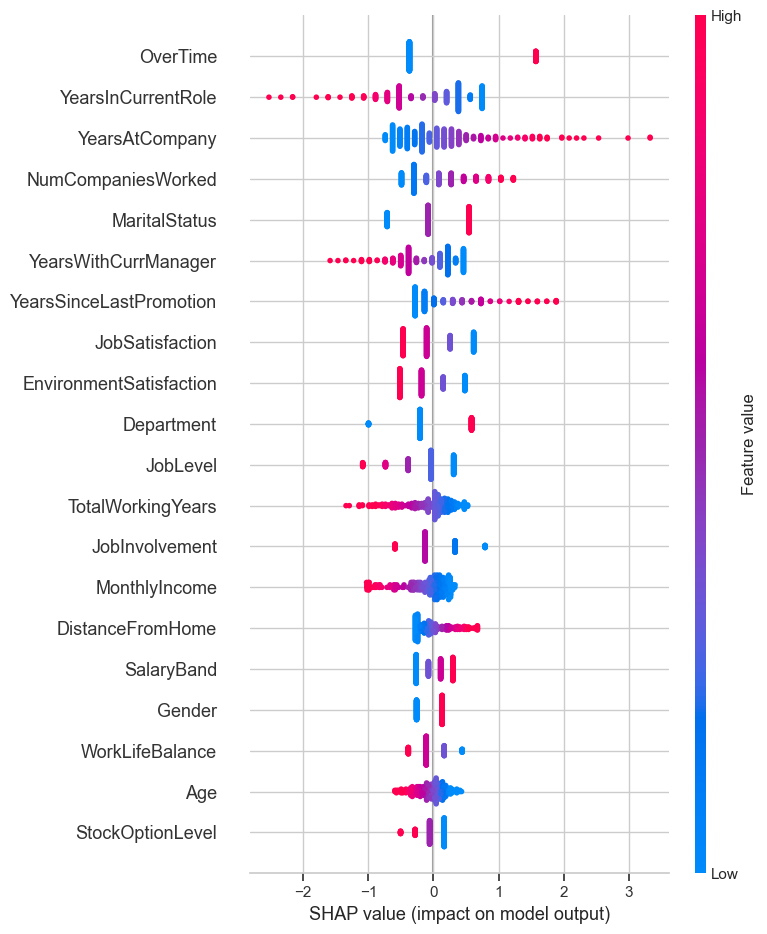

✅ SHAP Summary Plot - Decision Tree


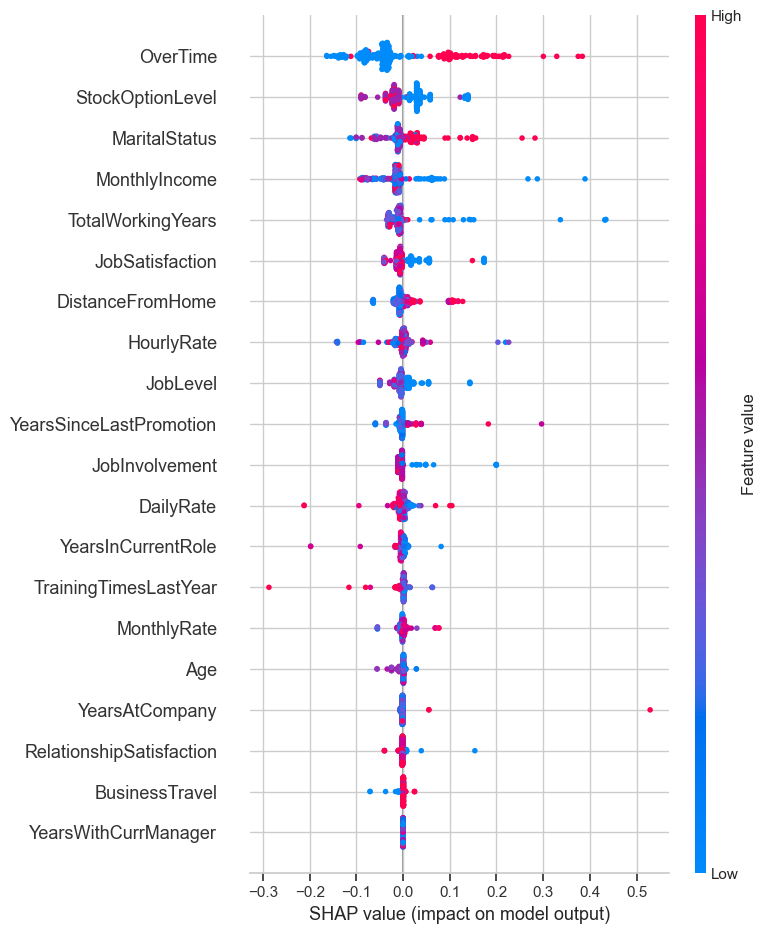

In [29]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Prepare data
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Logistic Regression ---
log_reg = LogisticRegression(max_iter=2000, solver="lbfgs")
log_reg.fit(X_train_scaled, y_train)

# SHAP for Logistic Regression
masker = shap.maskers.Independent(X_train_scaled)
explainer_log = shap.LinearExplainer(log_reg, masker)
shap_values_log = explainer_log(X_test_scaled)

print("✅ SHAP Summary Plot - Logistic Regression")
shap.summary_plot(shap_values_log.values, X_test, feature_names=X.columns, show=True)
plt.savefig("logistic_regression_shap.png", dpi=300, bbox_inches="tight")
plt.close()  

# --- Decision Tree ---
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# SHAP for Decision Tree
explainer_dt = shap.TreeExplainer(dt)
shap_values_dt = explainer_dt(X_test)

print("✅ SHAP Summary Plot - Decision Tree")
shap.summary_plot(shap_values_dt.values[:,:,1], X_test, feature_names=X.columns, show=True)  # Class=1 (Attrition=Yes)
plt.savefig("decision_tree_shap.png", dpi=300, bbox_inches="tight")
plt.close() 